In [3]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d mahmoudfaridd/louisianaflood2016classified

from zipfile import ZipFile
base_dir="/content/louisianaflood2016classified.zip"
with ZipFile(base_dir , 'r')as zip:
  zip.extractall()
  print('done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
louisianaflood2016classified.zip: Skipping, found more recently modified local copy (use --force to force download)
done


In [4]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model.h5')



1/1 [==============================] - 0s 18ms/step
0


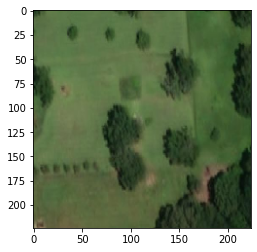

In [19]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = "/content/valid/0/1005.png"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels

class_labels = ['0','1']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])